![Dataging](https://raw.githubusercontent.com/dataging/public-resources/61263724aea5476ba5ebf38478beada519091957/logodataging.png)
# EDA inicial - Entendiendo los datos

In [2]:
import pandas as pd
import os
from dotenv import load_dotenv

In [3]:
load_dotenv() #lee las variables de entorno del archivo .env

servidor = os.getenv("SERVIDOR_MYSQL")
usuario = os.getenv("USUARIO_MYSQL")
password = os.getenv("PASSWORD_MYSQL")

import mysql.connector
try:
    cnx = mysql.connector.connect(user=usuario, password=password,
                              host=servidor, database='sakila') # Definimos la cadena de conexión de la base de datos e intentamos conectar
    cursor=cnx.cursor() #Creamos un cursor para poder ejecutar consultas    
except :
    print("Error conectando a la base de datos ")

In [4]:
consulta = "SELECT * FROM film"

df_film = pd.read_sql(consulta, cnx) #Leemos la tabla film de la base de datos sakila
df_film.head() #Mostramos los primeros registros

C:\Users\adminsql\AppData\Local\Temp\ipykernel_7932\540139603.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_film = pd.read_sql(consulta, cnx) #Leemos la tabla film de la base de datos sakila


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Deleted Scenes, Behind the Scenes}",2006-02-15 06:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Deleted Scenes, Trailers}",2006-02-15 06:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Deleted Scenes, Trailers}",2006-02-15 06:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Commentaries, Behind the Scenes}",2006-02-15 06:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 06:03:42


In [5]:
df_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   int64         
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      object        
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   float64       
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   float64       
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_update           1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1

In [6]:
df_film.describe()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,last_update
count,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,2006.0,1.0,4.985000,2.980000,115.272000,19.984000,2006-02-15 06:03:42.000000384
min,1.000000,2006.0,1.0,3.000000,0.990000,46.000000,9.990000,2006-02-15 06:03:42
25%,250.750000,2006.0,1.0,4.000000,0.990000,80.000000,14.990000,2006-02-15 06:03:42
50%,500.500000,2006.0,1.0,5.000000,2.990000,114.000000,19.990000,2006-02-15 06:03:42
75%,750.250000,2006.0,1.0,6.000000,4.990000,149.250000,24.990000,2006-02-15 06:03:42
max,1000.000000,2006.0,1.0,7.000000,4.990000,185.000000,29.990000,2006-02-15 06:03:42
std,288.819436,0.0,0.0,1.411654,1.646393,40.426332,6.050833,NaN


In [7]:
# ¿Cuál es la duración media de las películas?

df_film["length"].mean()
#df_film.lenght.mean()

np.float64(115.272)

In [15]:
df = df_film.select_dtypes(include=['int64', 'float64'])

df.head()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
0,1,2006,1,6,0.99,86,20.99
1,2,2006,1,3,4.99,48,12.99
2,3,2006,1,7,2.99,50,18.99
3,4,2006,1,5,2.99,117,26.99
4,5,2006,1,6,2.99,130,22.99


In [16]:
print (df.corr())

                   film_id  release_year  language_id  rental_duration  \
film_id           1.000000           NaN          NaN        -0.039527   
release_year           NaN           NaN          NaN              NaN   
language_id            NaN           NaN          NaN              NaN   
rental_duration  -0.039527           NaN          NaN         1.000000   
rental_rate      -0.012797           NaN          NaN         0.025777   
length            0.049141           NaN          NaN         0.061586   
replacement_cost -0.049518           NaN          NaN        -0.000831   

                  rental_rate    length  replacement_cost  
film_id             -0.012797  0.049141         -0.049518  
release_year              NaN       NaN               NaN  
language_id               NaN       NaN               NaN  
rental_duration      0.025777  0.061586         -0.000831  
rental_rate          1.000000  0.029789         -0.044620  
length               0.029789  1.000000        

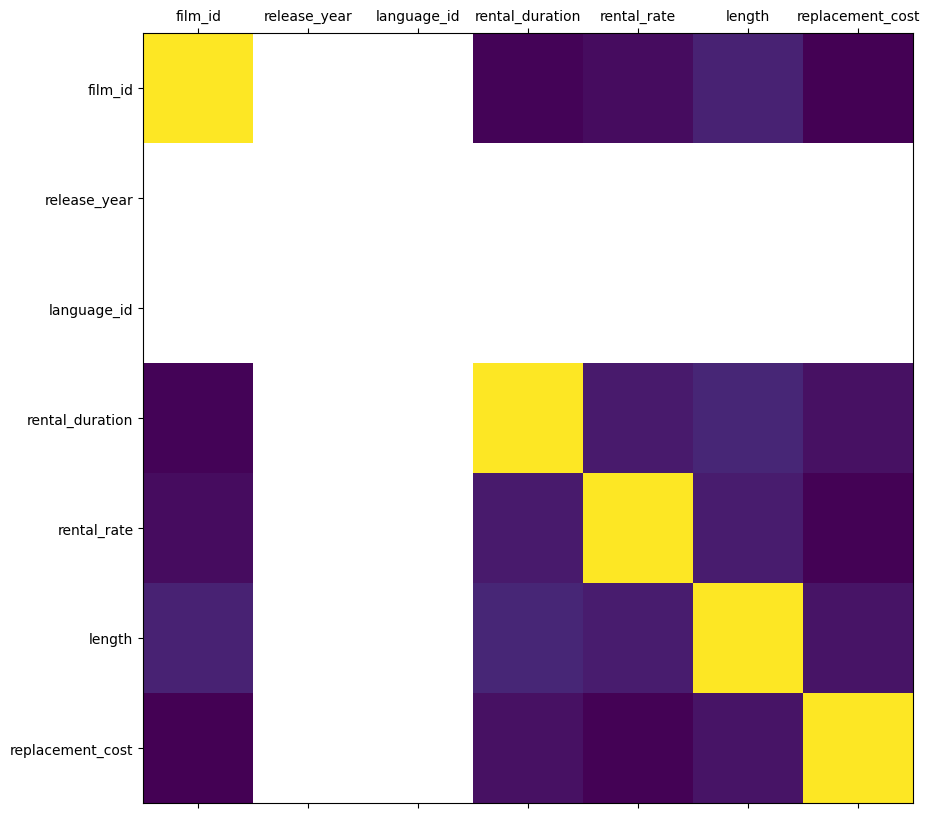

In [17]:
import matplotlib.pyplot as plt

correlacion = df.corr() 
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.matshow(correlacion) 
plt.xticks(range(len(correlacion.columns)), correlacion.columns); 
plt.yticks(range(len(correlacion.columns)), correlacion.columns);

<Axes: >

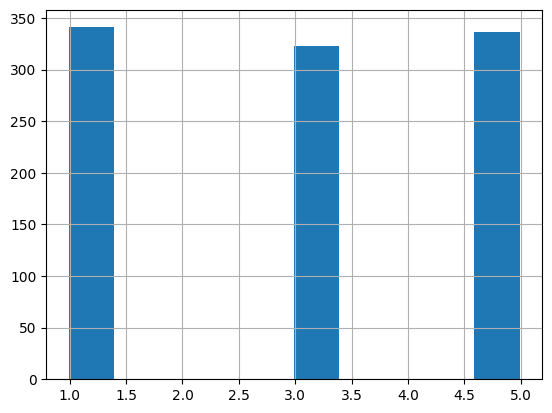

In [18]:
df.rental_rate.hist()

<Axes: xlabel='rental_rate', ylabel='length'>

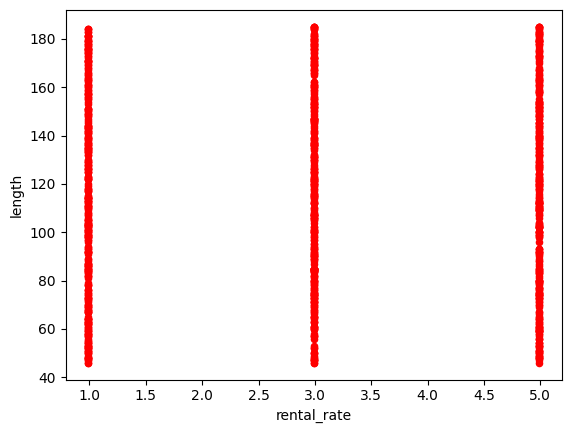

In [21]:
df.plot(kind='scatter', x='rental_rate', y='length' , color = 'red')

<Axes: xlabel='rental_rate'>

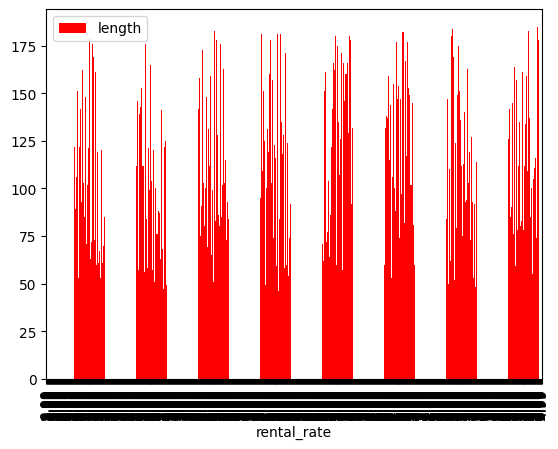

In [22]:
df.plot(kind='bar', x='rental_rate', y='length' , color = 'red')